In [81]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn import svm

In [82]:
from sklearn import svm
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

In [83]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [84]:
df = pd.read_csv('fake news data.csv')

In [85]:
df.sample(10)

,URLs,Headline,Body,Label
715,https://www.nytimes.com/2017/10/07/us/politics...,"The ‘Resistance,’ Raising Big Money, Upends Li...",Mr. James’s committee is among more than three...,1
3546,https://www.reuters.com/article/us-blackberry-...,BlackBerry details patent deal with Android ma...,FILE PHOTO: A man holds the new BlackBerry Key...,1
412,http://beforeitsnews.com/sports/2017/09/930-ex...,"9/30 Expo Park-Forbes Field Era: Temple Cup, '...",Red Flag Warning: These California Wildfires A...,0
2876,http://beforeitsnews.com/u-s-politics/2017/10/...,"Ryan Gosling, Guy On A Boat Give Dating Advice...",Red Flag Warning: These California Wildfires A...,0
3376,http://beforeitsnews.com/u-s-politics/2017/09/...,“Racist Propaganda”: Librarian Rejects Books D...,A Potato Battery Can Light up a Room for Over ...,0
3678,https://www.activistpost.com/2017/09/dhs-steps...,"DHS Steps In, Blocks US Entry For Indian Pasto...","By Janet Phelan\nOn the surface, the plan was ...",0
3100,https://www.nytimes.com/2017/10/07/world/afric...,Gas Station Explosion in Ghana Kills at Least ...,"Photo\nLAGOS, Nigeria — An explosion at a gas ...",1
2929,http://beforeitsnews.com/u-s-politics/2017/10/...,Avid Hunter Don Jr. On Gun Silencers: ‘It's Ju...,A Potato Battery Can Light up a Room for Over ...,0
2321,http://beforeitsnews.com/u-s-politics/2017/10/...,MLB Post Season Sunday: Who’s Playing and Wher...,MLB Post Season Sunday: Who’s Playing and Wher...,0
443,https://www.activistpost.com/2017/09/can-survi...,Can We Survive Technology? The Origin of SRM G...,By Peter A. Kirby\nIn the course of exposing c...,0


In [86]:
df.shape

(4009, 4)

In [87]:
df.describe()

,Label
count,4009.000000
mean,0.466949
std,0.498969
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
URLs        4009 non-null object
Headline    4009 non-null object
Body        3988 non-null object
Label       4009 non-null int64
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


In [89]:
df.describe(include=['O'])

,URLs,Headline,Body
count,4009,4009,3988
unique,3352,2831,2863
top,http://beforeitsnews.com/u-s-politics/2017/10/...,2017 Fantasy Football Kicker Rankings - Week 5,A Potato Battery Can Light up a Room for Over ...
freq,5,6,143


In [90]:
df.columns

Index(['URLs', 'Headline', 'Body', 'Label'], dtype='object')

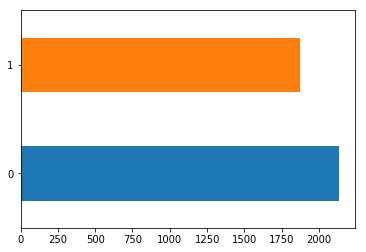

In [91]:
df['Label'].value_counts().plot(kind = "barh")

C:\Users\bhava\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


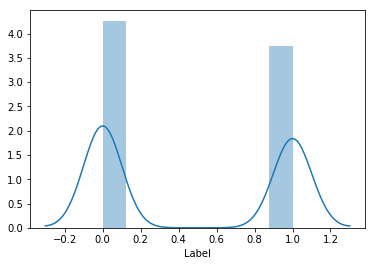

In [92]:
sns.distplot(df['Label'])

In [93]:
 df.isnull().sum()

URLs         0
Headline     0
Body        21
Label        0
dtype: int64

In [94]:
X = df.drop('URLs', axis=1)
y = df['URLs']

In [95]:
X = df['Headline']
y = df['Label']

In [96]:
X

0              Four ways Bob Corker skewered Donald Trump
1       Linklater's war veteran comedy speaks to moder...
2       Trump’s Fight With Corker Jeopardizes His Legi...
3       Egypt's Cheiron wins tie-up with Pemex for Mex...
4             Jason Aldean opens 'SNL' with Vegas tribute
5                        JetNation FanDuel League; Week 4
6       Kansas Tried a Tax Plan Similar to Trump’s. It...
7       India RBI chief: growth important, but not at ...
8       EPA chief to sign rule on Clean Power Plan exi...
9       Talks on sale of Air Berlin planes to easyJet ...
10      U.S. President Donald Trump Quietly Signs Law ...
11      2017 Fantasy Football Team Defense Rankings - ...
12               Just Shut Up & Play Some Damn Baseball!!
13      Deloitte cyber attack affected up to 350 clien...
14      10/7: Chuck Axed; HBD Brickyard, Adam, Moonlig...
15      Gunman’s Girlfriend Said She Didn’t Know He Pl...
16      Marilou Danley, Gunman’s Girlfriend, Says She ...
17      Trump’

In [97]:
y

0       1
1       1
2       1
3       1
4       1
5       0
6       1
7       1
8       1
9       1
10      0
11      0
12      0
13      1
14      0
15      1
16      1
17      1
18      0
19      0
20      0
21      0
22      1
23      0
24      0
25      1
26      0
27      1
28      0
29      1
       ..
3979    0
3980    1
3981    0
3982    0
3983    0
3984    1
3985    1
3986    1
3987    0
3988    1
3989    1
3990    0
3991    0
3992    0
3993    0
3994    0
3995    1
3996    0
3997    0
3998    0
3999    1
4000    0
4001    1
4002    1
4003    0
4004    0
4005    0
4006    0
4007    1
4008    0
Name: Label, Length: 4009, dtype: int64

In [98]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [99]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (3207,)
Test feature set size: (802,)
Training variable set size: (3207,)
Test variable set size: (802,)


In [100]:
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(tfidf_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [101]:
y_pred = svm_classifier.predict(tfidf_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

In [102]:
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[389  66]
 [ 61 286]]


In [103]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8416458852867831


In [104]:
tfvect = TfidfVectorizer(stop_words='english',max_df=0.7)
tfid_x_train = tfvect.fit_transform(X_train)
tfid_x_test = tfvect.transform(X_test)
classifier = PassiveAggressiveClassifier(max_iter=50)
classifier.fit(tfid_x_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              fit_intercept=True, loss='hinge', max_iter=50, n_iter=None,
              n_jobs=1, random_state=None, shuffle=True, tol=None,
              verbose=0, warm_start=False)

In [105]:
def fake_news_data(Headline):
    input_data = [Headline]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = classifier.predict(vectorized_input_data)
    print(prediction)

In [107]:
fake_news_data ('9/28 Through the 40s: The Gloaming; HBD Bill, Lou, Cy the Third, Everett, Cy, Leon & Buck; Clarke Honored;Tiny 2-Hitter')

[0]


In [108]:
fake_news_data('Shanghai Masters: Kyle Edmund beats Jiri Vesely to reach second round')

[1]


In [109]:
fake_news_data('The ‘Sweet Season’ in Coming Up, But with Good Habits and Careful Monitoring, Teeth Problems can be Avoided, According to Gilroy Dentist')

[0]


With the import of the head lines we can detect the fake news 
If the news is fake it gives the output:0
If the news id true it gives the output:1
 As i performed above 